In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'credit-card-fraud:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2156255%2F3594108%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240925%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240925T070551Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1f4a788cdff5caa3c384724ef938c31b3dc18062607aa589f8c3474451993e6609bc1d872a945f40f4321b4d23df2922456e6b853ccfb2de9a8d09b451edbb88126680e3fa4424e58fe2c34c6f3a0f9f3cf68aced15a23754a261401e215f990aa7ecec5b84814ff481b7054e6570a06974601f62c83ed960d196b55d124a56198114d446edf541defa85541aeeebca1feb50d00fbc8d01cc69d693e63f4b074dd2519c8f9b474b75fb7c57ce04cb9280ef6ff5c026126b280a7f60eff5d1f27a74d256e357e8b3c5790ab3a42dfb5396393f4afb6cf5ef5fff0e297770595028ba4965e6d5ffcef9c9a6ca71cf6bf32ea5d6eddcf1941edcbbae0c4171f54b3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud/card_transdata.csv


Dataset_link - https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data

**About Dataset**

* Digital payments are evolving, but so are cyber criminals.

* According to the Data Breach Index, more than 5 million records are being    stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

* In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.

**Feature Explanation:**

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/kaggle/input/credit-card-fraud/card_transdata.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


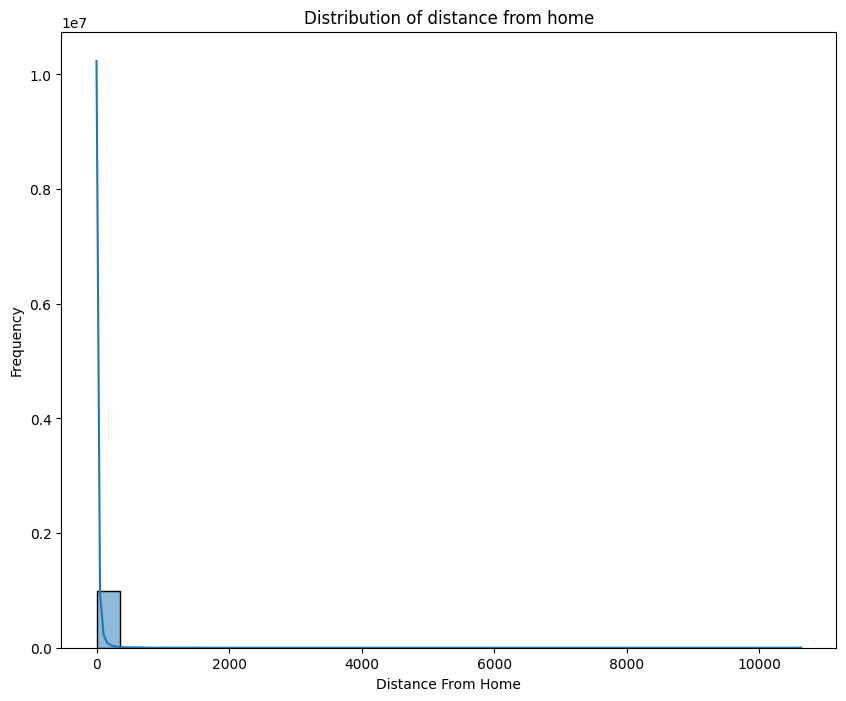

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['distance_from_home'],bins=30,kde=True)
plt.title('Distribution of distance from home')
plt.xlabel('Distance From Home')
plt.ylabel('Frequency')
plt.show();

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


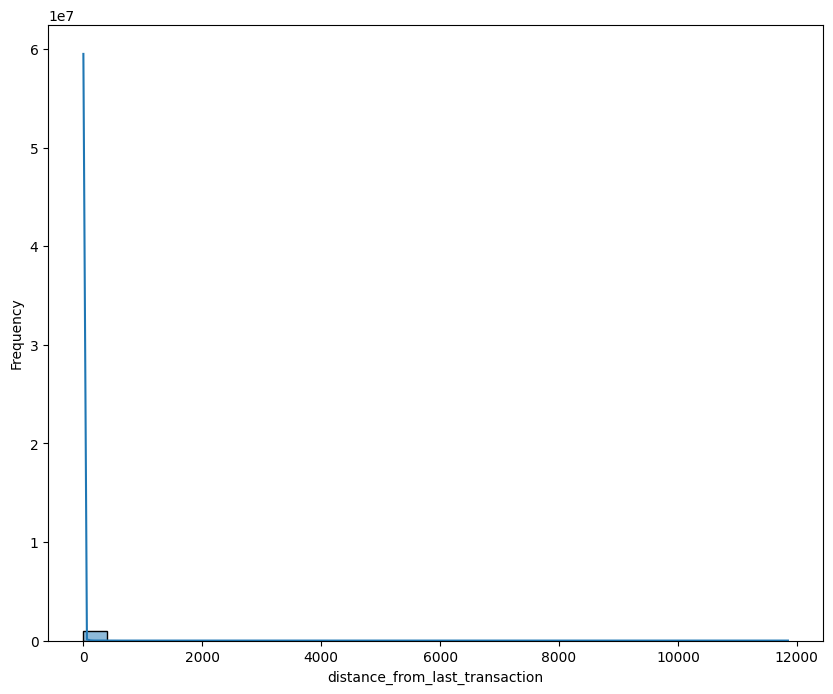

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['distance_from_last_transaction'],bins=30,kde=True)
plt.xlabel('distance_from_last_transaction')
plt.ylabel('Frequency')
plt.show()


long tail in the distribution. Outliers are likely present in both columns i.e **distance_from_last_transaction & distance_from_Home**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


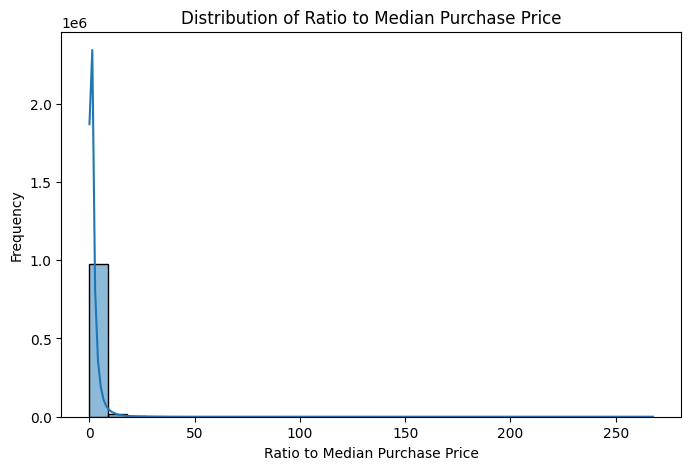

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['ratio_to_median_purchase_price'], bins=30, kde=True)
plt.title('Distribution of Ratio to Median Purchase Price')
plt.xlabel('Ratio to Median Purchase Price')
plt.ylabel('Frequency')
plt.show()


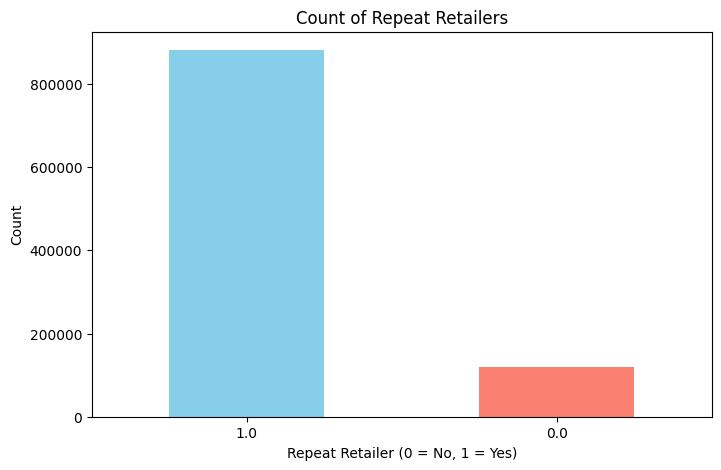

In [ ]:
repeat_counts = df['repeat_retailer'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 5))
repeat_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Repeat Retailers')
plt.xlabel('Repeat Retailer (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

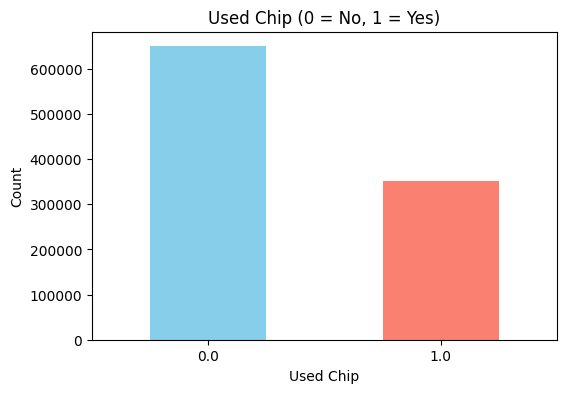

In [ ]:

# Bar graph
plt.figure(figsize=(6, 4))
df['used_chip'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Used Chip (0 = No, 1 = Yes)')
plt.xlabel('Used Chip')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

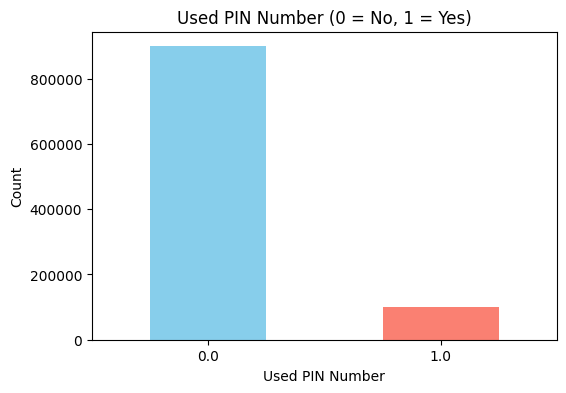

In [ ]:
# Bar graph
plt.figure(figsize=(6, 4))
df['used_pin_number'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Used PIN Number (0 = No, 1 = Yes)')
plt.xlabel('Used PIN Number')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

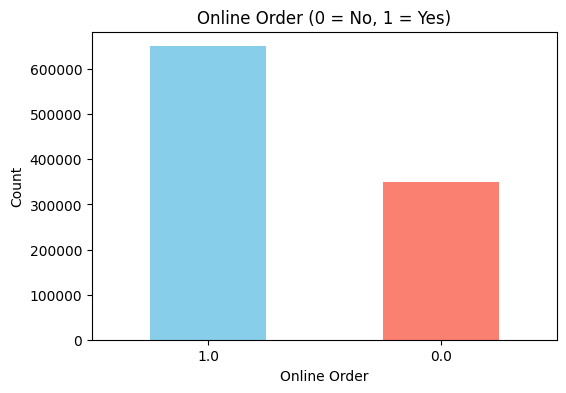

In [ ]:
# Bar graph
plt.figure(figsize=(6, 4))
df['online_order'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Online Order (0 = No, 1 = Yes)')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

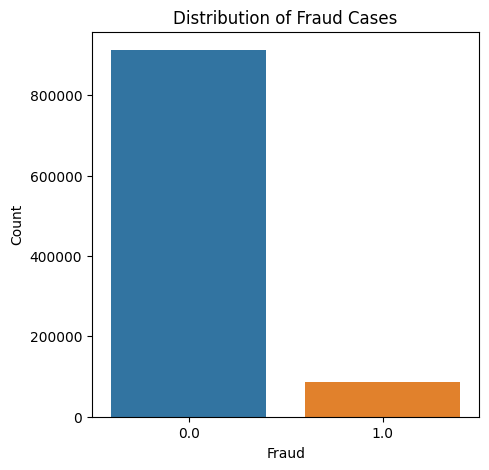

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='fraud', data=df)
plt.title('Distribution of Fraud Cases')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()


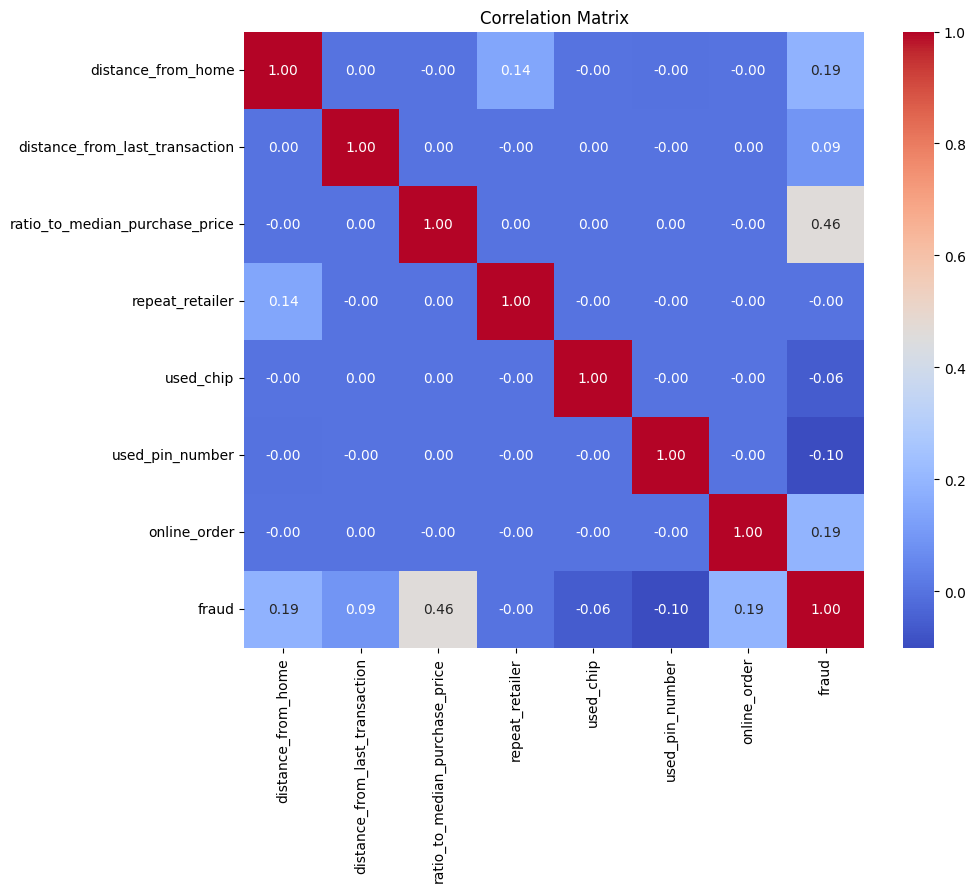

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#  Split the dataset into features and target variable
X = df.drop('fraud', axis=1)  # Features
y = df['fraud']                # Target variable

#  Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 3. Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)


# Print accuracy scores
print(f"\n Logistic_reg Training Accuracy: {train_accuracy:.4f}")
print(f"Logistic_reg Test Accuracy: {test_accuracy:.4f}")


 Logistic_reg Training Accuracy: 0.9585
Logistic_reg Test Accuracy: 0.9593


In [ ]:
# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[181291   1228]
 [  6916  10565]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.90      0.60      0.72     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



In [ ]:
#Due to imbalance in traget column  Logistic regreesion is not performing well

Random_forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 3. Train a Random Forest Classifier with class weights
model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)


# Print accuracy scores
print(f"\n Random_Forest Training Accuracy: {train_accuracy:.4f}")
print(f" Random_forest Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 1.0000
Test Accuracy: 1.0000


In [ ]:
# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[182519      0]
 [     5  17476]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       1.00      1.00      1.00     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [ ]:
# # For saving & download Model
# import joblib

# # Save the model to a file
# joblib_file = "random_forest_model.joblib"
# joblib.dump(model, joblib_file)
